In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Minimalizace

Ukázka Newtonovy metody


In [2]:
def newton_min(f, df, ddf, a):
    for i in range(10):
        a_new = a - df(a)/ddf(a)
        if a_new == a:
            if ddf(a) > 0:
                return a
            else:
                raise(RuntimeError("Method did not converge to minimum"))
        a = a_new

In [3]:
def f(x): return x**2 + x
def df(x): return 2*x + 1
def ddf(x): return 2

In [4]:
newton_min(f, df, ddf, 1)

-0.5

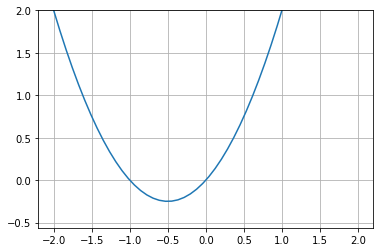

In [5]:
x = np.linspace(-2, 2)
plt.plot(x, f(x))
plt.ylim(ymax=2)
plt.grid()

Úkol č. 1: naprogramujte hledání minima metoda zlatého řezu (dělení intervalu).

Najděte minimum funkce `cos(x)` v intervalu `[2, 4]`. Sledujte rychlost konvergence - tedy přesnost určení polohy minima `xmin` a funkční hodnoty `cos(xmin)` v minimu v závislosti na počtu iterací. S jakou přesností lze tyto parametry určit?

In [6]:
def golden_min(f, a, b, tol=1e-5):
    # ukol 1
    

In [9]:
f = np.cos
true_min = np.pi

Poté najděte minimum funkce `1 + (x-0.1)**4` na intervalu `[-1, 1]` a obdobným způsobem zhodnoťte přenost určení minima.

In [10]:
f = lambda x: 1 + (x-0.1)**4
true_min = 0.1


## Řešení Poissonovy rovnice

Vypočtěte teplotní profil uvnitř polystyrenové desky s tepelnou vodivostí $k=0.03\rm\ W / m\,K$ o síle $L=0.1\rm\ m$, kde na jedné straně desky je teplota $T_1 = 200\rm\ K$ a na druhé straně $T_2 = 300\rm\ K$.

Řešte tedy Poissonovu rovnici
$$-k\Delta T = 0$$
Použijte 100 mřížových bodů (včetně okrajů). Řešte nejprve Jacobiho metodou. Jako kritérium zastavení výpočtu porovnávejte sumu kvadrátů změny v poslední iteraci s epsilon=1e-5: `sum(res**2) < epsilon**2`

In [138]:
xmax = 0.1
k = 0.03
T1, T2 = 200., 300.

In [139]:
Nx = 100
dx = xmax/(Nx-1)

Definujeme pole neznámých a zapíšeme okrajové podmínky

In [140]:
U0 = np.zeros(Nx)
U0[0] = T1
U0[-1] = T2

In [141]:
U = U0.copy()
maxiter = 100000
for it in range(maxiter):
    # ukol 2 doplnit jadro Jacobiho metody
    
    
    if sum(res**2) < epsilon**2: break

Řešte stejný problém Gauss-Seidelovou metodou a porovnejte potřebný počet iterací

In [ ]:
U = U0.copy()
for it in range(maxiter):
    # ukol 3 doplnit jadro Gauss-Seidelovy metody
    
    
    
    
    if err < epsilon**2: break

Aplikujte superrelaxaci v řešiči s Gauss-Seidelovou metodou. Studujte závislost počtu iterací na parametru `omega` v intervalu `[1, 2]`.

In [147]:
def solve_poisson_SOR(U0, Nx, omega, maxiter=10**5):
    U = U0.copy()
    for it in range(maxiter):
        # ukol 4 jadro Gauss-Seidelovy metody doplnene
        # o superrelaxaci
        
        
        
        
    return it

In [ ]:
omega = np.linspace(1, 2, 100)
iters = [solve_poisson_SOR(U0, Nx, o) for o in omega]

In [ ]:
plt.plot(omega, iters)
omega_theory = 2/(1+np.sqrt(1 - np.cos(np.pi/(Nx-2))**2))
plt.axvline(omega_theory, c="r")
plt.grid()
plt.ylim(0, 13000)